   # The Spark Foundation

# Task name- Prediction using supervised ML


Predict the percentage of marks of the students based on the number of hours they studied

 Author name- Rahul shrivastava

In [43]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [46]:
df=pd.read_csv(r'C:\Users\aios210720\Desktop\student_scores - student_scores.csv')

In [51]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [52]:
# Check if there any null value in the Dataset
df.isnull == True

False

# 
There is no null value in dataset

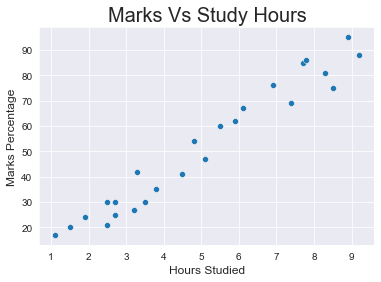

In [22]:
sns.set_style('darkgrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

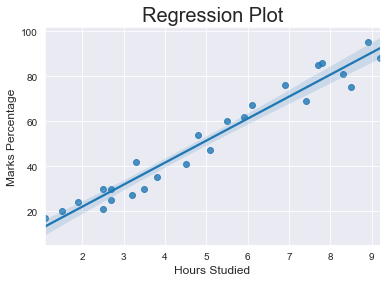

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [24]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(df.corr())

# 
It is confirmed that the variables are positively correlated


# Training the model

# 1. split the data

In [25]:
# Defining X and y from the Data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# 2. Fitting the data into the model

In [28]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print('Model Trained')

Model Trained


# Predicting the percentage of marks

In [33]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# compare the predict marks with actual marks

In [34]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


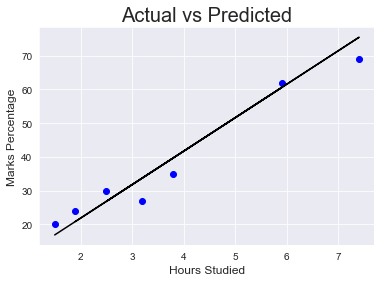

In [35]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Evaluate the model 

In [38]:
# Calculating the accuracy of the model

print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


# What will be the predict score of a student if he/she studies for 9.25 hrs/ day?

In [37]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


# 

According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.